<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(0_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.4_n20.csv',
 'data_multi_delta_0.4_n30.csv',
 'data_multi_delta_0.4_n60.csv',
 'data_multi_delta_0.4_n120.csv',
 'data_multi_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,37.000675,48.542292,54.047076,-0.778336,148.811708,149.504143,-0.692435
1,0.0,1.0,36.994238,81.552361,46.553283,-0.965421,174.134461,175.205531,-1.071069
2,0.0,2.0,82.677858,33.858480,75.266410,-1.769653,200.033097,201.880296,-1.847199
3,0.0,3.0,77.205980,58.573553,24.407411,-0.913932,169.273011,170.202943,-0.929932
4,0.0,4.0,37.601660,29.980274,40.494407,-2.483709,115.592632,117.812823,-2.220191
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,87.819664,51.847645,76.408522,0.146712,226.222542,226.656538,-0.433995
119996,999.0,116.0,69.178297,28.740463,22.633550,0.351464,130.903773,131.146939,-0.243165
119997,999.0,117.0,67.318082,34.924121,66.372638,2.166960,180.781800,179.066778,1.715022
119998,999.0,118.0,60.625803,27.047575,41.564146,-0.025324,139.212200,139.704026,-0.491826


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,37.000675,48.542292,54.047076,-0.778336,148.811708,149.504143,-0.692435
1,0.0,1.0,36.994238,81.552361,46.553283,-0.965421,174.134461,175.205531,-1.071069
2,0.0,2.0,82.677858,33.858480,75.266410,-1.769653,200.033097,201.880296,-1.847199
3,0.0,3.0,77.205980,58.573553,24.407411,-0.913932,169.273011,170.202943,-0.929932
4,0.0,4.0,37.601660,29.980274,40.494407,-2.483709,115.592632,117.812823,-2.220191
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,87.819664,51.847645,76.408522,0.146712,226.222542,226.656538,-0.433995
119996,999.0,116.0,69.178297,28.740463,22.633550,0.351464,130.903773,131.146939,-0.243165
119997,999.0,117.0,67.318082,34.924121,66.372638,2.166960,180.781800,179.066778,1.715022
119998,999.0,118.0,60.625803,27.047575,41.564146,-0.025324,139.212200,139.704026,-0.491826


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    37.000675  48.542292  54.047076  ...  148.811708  149.504143 -0.692435
      1.0    36.994238  81.552361  46.553283  ...  174.134461  175.205531 -1.071069
      2.0    82.677858  33.858480  75.266410  ...  200.033097  201.880296 -1.847199
      3.0    77.205980  58.573553  24.407411  ...  169.273011  170.202943 -0.929932
      4.0    37.601660  29.980274  40.494407  ...  115.592632  117.812823 -2.220191
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  87.819664  51.847645  76.408522  ...  226.222542  226.656538 -0.433995
      116.0  69.178297  28.740463  22.633550  ...  130.903773  131.146939 -0.243165
      117.0  67.318082  34.924121  66.372638  ...  180.781800  179.066778  1.715022
      118.0  60.625803  27.047575  41.564146  ...  139.212200  139.704026 -0.491826
      119.0  24.219710  53.514241  81.641249  ...  171.310183  169.219794  2.090389

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    37.000675  48.542292  54.047076  ...  148.811708  149.504143 -0.692435
      1.0    36.994238  81.552361  46.553283  ...  174.134461  175.205531 -1.071069
      2.0    82.677858  33.858480  75.266410  ...  200.033097  201.880296 -1.847199
      3.0    77.205980  58.573553  24.407411  ...  169.273011  170.202943 -0.929932
      4.0    37.601660  29.980274  40.494407  ...  115.592632  117.812823 -2.220191
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  87.819664  51.847645  76.408522  ...  226.222542  226.656538 -0.433995
      116.0  69.178297  28.740463  22.633550  ...  130.903773  131.146939 -0.243165
      117.0  67.318082  34.924121  66.372638  ...  180.781800  179.066778  1.715022
      118.0  60.625803  27.047575  41.564146  ...  139.212200  139.704026 -0.491826
      119.0  24.219710  53.514241  81.641249  ...  171.310183  169.219794  2.090389

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,37.000675,48.542292,54.047076,-0.778336,148.811708,149.504143,-0.692435
1,0.0,1.0,36.994238,81.552361,46.553283,-0.965421,174.134461,175.205531,-1.071069
2,0.0,2.0,82.677858,33.858480,75.266410,-1.769653,200.033097,201.880296,-1.847199
3,0.0,3.0,77.205980,58.573553,24.407411,-0.913932,169.273011,170.202943,-0.929932
4,0.0,4.0,37.601660,29.980274,40.494407,-2.483709,115.592632,117.812823,-2.220191
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,87.819664,51.847645,76.408522,0.146712,226.222542,226.656538,-0.433995
119996,999.0,116.0,69.178297,28.740463,22.633550,0.351464,130.903773,131.146939,-0.243165
119997,999.0,117.0,67.318082,34.924121,66.372638,2.166960,180.781800,179.066778,1.715022
119998,999.0,118.0,60.625803,27.047575,41.564146,-0.025324,139.212200,139.704026,-0.491826


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    37.000675  48.542292  54.047076  ...  148.811708  149.504143 -0.692435
      1.0    36.994238  81.552361  46.553283  ...  174.134461  175.205531 -1.071069
      2.0    82.677858  33.858480  75.266410  ...  200.033097  201.880296 -1.847199
      3.0    77.205980  58.573553  24.407411  ...  169.273011  170.202943 -0.929932
      4.0    37.601660  29.980274  40.494407  ...  115.592632  117.812823 -2.220191
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  87.819664  51.847645  76.408522  ...  226.222542  226.656538 -0.433995
      116.0  69.178297  28.740463  22.633550  ...  130.903773  131.146939 -0.243165
      117.0  67.318082  34.924121  66.372638  ...  180.781800  179.066778  1.715022
      118.0  60.625803  27.047575  41.564146  ...  139.212200  139.704026 -0.491826
      119.0  24.219710  53.514241  81.641249  ...  171.310183  169.219794  2.090389

[120000 rows x 7 columns]

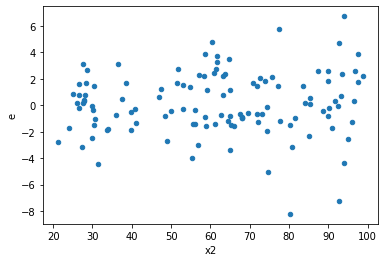

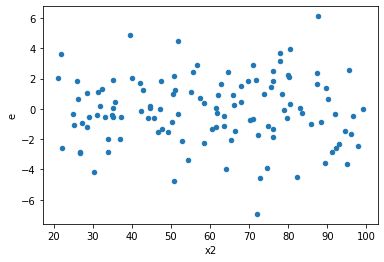

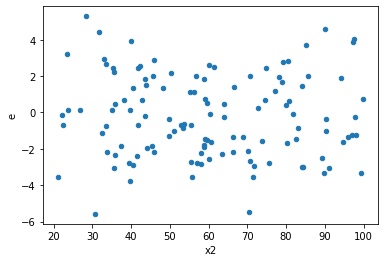

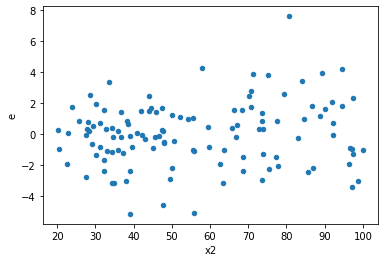

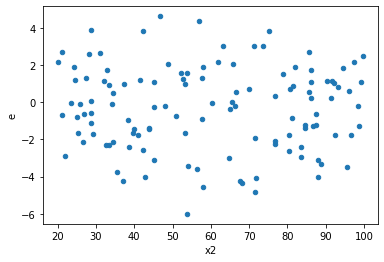

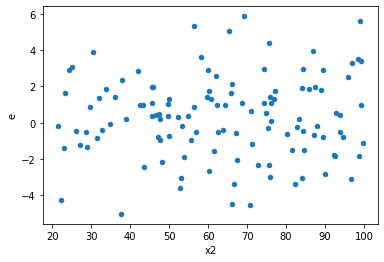

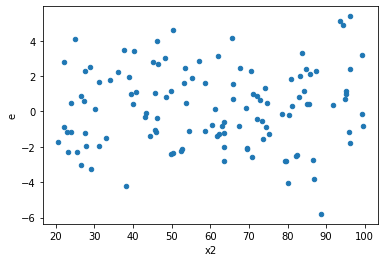

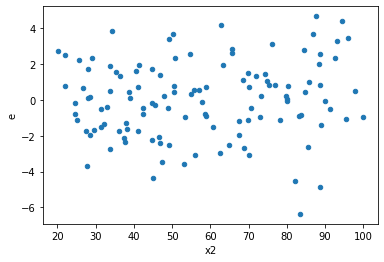

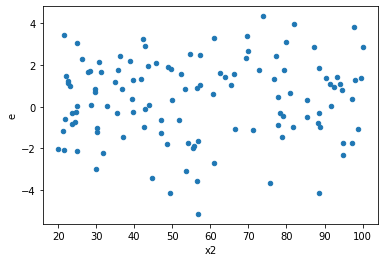

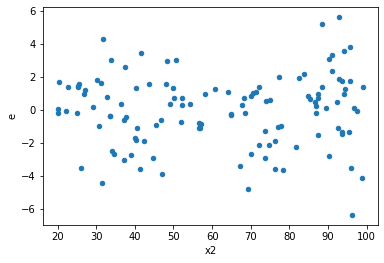

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,45.0,45.0,359.620360576761,158.95933352654794,8.173190013108204,3.612712125603362,2.2623418996450466,0.007212536998448815,0.9963937315007756,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,301.56679943983147,178.4459972308442,6.853790896359806,4.05559084615555,1.6899611317686982,0.08180005020317993,0.95909997489841,Reject001=1 : Homoscedasticity
3.0,45.0,45.0,250.25511132475543,133.5694886305839,5.687616166471714,3.035670196149634,1.8735948897497958,0.03775512843466289,0.9811224357826686,Reject001=1 : Homoscedasticity
4.0,45.0,45.0,217.8840686128726,179.16886417773372,4.951910650292559,4.072019640403039,1.2160822116767664,0.5143841469487893,0.7428079265256053,Reject001=1 : Homoscedasticity
5.0,45.0,45.0,222.70136016512265,167.2809633492805,5.061394549207333,3.8018400761200115,1.331301277241721,0.34065565337053005,0.829672173314735,Reject001=1 : Homoscedasticity
6.0,45.0,45.0,242.44648302950029,210.00149775859637,5.510147341579552,4.772761312695372,1.1544988279474107,0.6319404424193211,0.6840297787903394,Reject001=1 : Homoscedasticity
7.0,45.0,45.0,248.42766613959233,148.3740960682988,5.6460833213543715,3.372138547006791,1.6743331398308057,0.08729267647534478,0.9563536617623276,Reject001=1 : Homoscedasticity
8.0,45.0,45.0,154.72729732440826,128.781488836336,3.516529484645642,2.926852019007636,1.2014715680220618,0.5406708738588786,0.7296645630705607,Reject001=1 : Homoscedasticity
9.0,45.0,45.0,240.05205549579318,188.42922698958378,5.455728533995299,4.28248243158145,1.27396401997161,0.41986060664024727,0.7900696966798764,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,359.620360576761,158.95933352654794,8.173190013108204,3.612712125603362,2.2623418996450466,0.007212536998448815,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,301.56679943983147,178.4459972308442,6.853790896359806,4.05559084615555,1.6899611317686982,0.08180005020317993,Reject001=1 : Homoscedasticity
2.0,45.0,45.0,202.84584907860753,246.72646716315495,4.610132933604716,5.607419708253522,0.8221487196364299,0.5139558037392076,Reject001=1 : Homoscedasticity
3.0,45.0,45.0,250.25511132475543,133.5694886305839,5.687616166471714,3.035670196149634,1.8735948897497958,0.03775512843466289,Reject001=1 : Homoscedasticity
4.0,45.0,45.0,217.8840686128726,179.16886417773372,4.951910650292559,4.072019640403039,1.2160822116767664,1.4856158530512107,Reject001=1 : Homoscedasticity
5.0,45.0,45.0,222.70136016512265,167.2809633492805,5.061394549207333,3.8018400761200115,1.331301277241721,0.34065565337053005,Reject001=1 : Homoscedasticity
6.0,45.0,45.0,242.44648302950029,210.00149775859637,5.510147341579552,4.772761312695372,1.1544988279474107,1.3680595575806789,Reject001=1 : Homoscedasticity
7.0,45.0,45.0,248.42766613959233,148.3740960682988,5.6460833213543715,3.372138547006791,1.6743331398308057,0.08729267647534478,Reject001=1 : Homoscedasticity
8.0,45.0,45.0,154.72729732440826,128.781488836336,3.516529484645642,2.926852019007636,1.2014715680220618,1.4593291261411214,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      926
Reject001=0 : Heteroscedasticity     74
Name: Result_test, dtype: int64